# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# Mikrotonale Intervalle

In [2]:
def midi_to_frequency(p):
    return (2 ** ((p - 69) / 12)) * 440
    
def frequency_to_midi(f):
#     return np.round(12 * np.log2(f / 440) + 69)
    return 12 * np.log2(f / 440) + 69

print('Pitch: %d, Frequency: %.2f' % (68, midi_to_frequency(68)))
print('Pitch: %d, Frequency: %.2f' % (69, midi_to_frequency(69)))
print('Pitch: %d, Frequency: %.2f' % (70, midi_to_frequency(70)))

print('Frequency: %.2f, Pitch: %.2f' % (400, frequency_to_midi(400)))
print('Frequency: %.2f, Pitch: %.2f' % (440, frequency_to_midi(440)))
print('Frequency: %.2f, Pitch: %.2f' % (550, frequency_to_midi(550)))

Pitch: 68, Frequency: 415.30
Pitch: 69, Frequency: 440.00
Pitch: 70, Frequency: 466.16
Frequency: 400.00, Pitch: 67.35
Frequency: 440.00, Pitch: 69.00
Frequency: 550.00, Pitch: 72.86


In [3]:
print(midi_to_frequency(69))
print(midi_to_frequency(69.5))
print(midi_to_frequency(69.25))
print(midi_to_frequency(70))

440.0
452.8929841231365
446.39994737251044
466.1637615180899


Cent

- 100 Cent --> 1 Halbtonschritt

In [4]:
# p + 1    --> 100 Cent
# p + 0.5  -->  50 Cent
# p + 0.25 -->  25 Cent

def calc_cents(freq1, freq2):
    # return 12 * np.log2(f / 440) + 69
    return 12 * np.log2(freq2 / freq1) * 100

print(calc_cents(440, 452.8929841231365))
print(calc_cents(440, 446.39994737251044))
print(calc_cents(440, 466.1637615180899))
print(calc_cents(440, 880))

50.00000000000008
25.000000000000178
100.00000000000009
1200.0


# Fensterung / Windowing || gemittelte /max-Amplituden-Envelopes

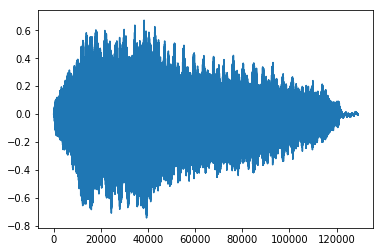

In [5]:
x, sr = lr.load('violin.mp3')

display(Audio(x, rate=sr))
plt.plot(x)

## Mittelwert

$\frac{1}{K} \sum_{k=0}^{K} x_k, K = 100$

$\frac{1}{K} (x_0 + x_1 + x_2 + ... + x_{K-1} + x_K)$

In [6]:
a = np.array([1, 2, 3, 4, 5])

# methode 1
summe = 0
for element in a:
    summe += element
mean = summe / np.shape(a)[0]
print(mean)

# methode 2
summe = np.sum(a)
mean = summe / np.shape(a)[0]
print(mean)

# methode 3
mean = np.mean(a)
print(mean)

3.0
3.0
3.0


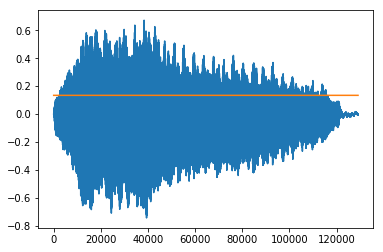

In [7]:
mean_amp = np.mean(np.abs(x))

mean_amp_array = np.ones(np.shape(x)[0]) * mean_amp
plt.plot(x)
plt.plot(mean_amp_array)

220.5
5.845124716553288
1288


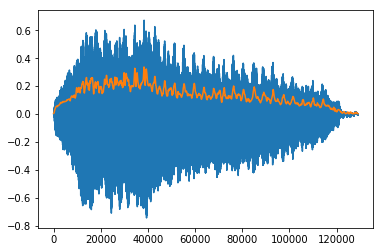

In [8]:
hop_length = 100
window_length = 200

# berechnung der anzahl der fenster (einfall von niklas)
x_length_sec = (np.shape(x)[0] - window_length) / sr
wins_per_sec = sr / hop_length
num_wins = int(x_length_sec * wins_per_sec)

# andere variante der berechnung
num_wins = int((np.shape(x)[0] - window_length) / hop_length)

print(wins_per_sec)
print(x_length_sec)
print(num_wins)

mean_amp_env = np.array([])
for win_index in range(num_wins):
    # print((win_index * hop_length), (win_index * hop_length) + window_length)
    window = x[(win_index * hop_length):(win_index * hop_length) + window_length]
    mean_amp = np.mean(np.abs(window))
    mean_amp_env = np.append(mean_amp_env, mean_amp)

plt.plot(x)
t = np.linspace(0, np.shape(x)[0], np.shape(mean_amp_env)[0])
plt.plot(t, mean_amp_env)

## Max

220.5
5.845124716553288
1288


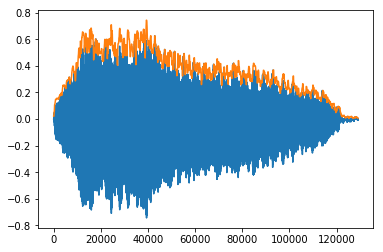

In [9]:
hop_length = 100
window_length = 200

# berechnung der anzahl der fenster (einfall von niklas)
x_length_sec = (np.shape(x)[0] - window_length) / sr
wins_per_sec = sr / hop_length
num_wins = int(x_length_sec * wins_per_sec)

# andere variante der berechnung
num_wins = int((np.shape(x)[0] - window_length) / hop_length)

print(wins_per_sec)
print(x_length_sec)
print(num_wins)

max_amp_env = np.array([])
for win_index in range(num_wins):
    # print((win_index * hop_length), (win_index * hop_length) + window_length)
    window = x[(win_index * hop_length):(win_index * hop_length) + window_length]
    max_amp = np.max(np.abs(window))
    # max_amp = np.max(window)
    max_amp_env = np.append(max_amp_env, max_amp)

plt.plot(x)
t = np.linspace(0, np.shape(x)[0], np.shape(max_amp_env)[0])
plt.plot(t, max_amp_env)